# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        counts={}
        x = self._y
        for i in range(len(x)):
            for j in range(len(x[i])):
                val=x[i][j]
                if val in counts:
                    counts[val] += 1
                else:
                    counts[val] = 1
        #END Workspace 1.1
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        label = 0
        freq = dict()
        x = self._y
        for i in range(len(x)):
            for j in range(len(indices)):
                for k in range(len(indices[j])):
                    val = x[i][indices[j][k]]
                    if val in freq:
                        freq[val]+=1
                    else:
                        freq[val]=1
        itemMaxValue = max(freq.items(), key=lambda a: a[1])
        listOfKeys = list()
        for key,value in freq.items():
            if value == itemMaxValue[1]:
                listOfKeys.append(key)
        if len(listOfKeys)==1:
            label=listOfKeys[0]
        else:
            counts1=self.getCounts()
            c=0
            for p in range(len(listOfKeys)-1):
                if counts1[listOfKeys[p+1]]>counts1[listOfKeys[p]] and counts1[listOfKeys[p+1]]>label:
                    c= counts1[listOfKeys[p+1]]
                    label=listOfKeys[p+1]
                else:
                    c= counts1[listOfKeys[p]]
                    label=listOfKeys[p]
        
        #END Workspace 1.2
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        ans = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        dist, ind = self._model.query([point], self._k)
        ans= self.majority(ind)
        #END Workspace 1.3
        return(ans)
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        C = np.array([])
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        count={}
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                val=testY[i][j]
                if val in count:
                    count[val]+=1
                else:
                    count[val]=1
        target_count=len(count)
        C = [[0 for x in range(target_count)] for x in range(target_count)]
        predicted =[]
        for i in range(len(testX)):
            result = self.classify(testX[i])
            predicted.append(result)

        actual=[]
        actual = [[0 for x in range(len(predicted))] for x in range(len(predicted))]
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                actual[i]=testY[i][j]
            
        classes  = np.unique(np.concatenate((actual,predicted)))
        C = np.empty((len(classes),len(classes)),dtype=np.int)
        for i,a in enumerate(classes):
            for j,p in enumerate(classes):
                C[i,j] = np.where((actual==a)*(predicted==p))[0].shape[0]
        #END Workspace 1.4
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        return(score)



1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification




In [3]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        #BEGIN Workspace
        #Add more tests as desired
        self.assertEqual(self.knnone.classify(self.testPoints[1]), -1)
        self.assertEqual(self.knnthree.classify(self.testPoints[0]), -1)
        #END Workspace
    
    #BEGIN Workspace
    #Add more test functions as desired
    #HINT - You'll want to make sure each of your functions from the KNNClassifier class you created work correctly...
    def testConfusionMatrix(self):
        print("Additional test case for confusion matrix")
        self.testX = np.array([[2,1], [2,6], [4, 4]])
        self.testY = np.array([[1],[-1],[-1]])
        print(self.knnone.confusionMatrix(self.testX,self.testY))
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...

Additional test case for confusion matrix
[[2 0]
 [0 1]]



----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [4]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 2.1
        #self.train_x = np.array() # A 2D np.array of training examples, REPLACE
        #self.train_y = np.array() # A 1D np.array of training answers, REPLACE
        #self.test_x = np.array() # A 2D np.array of testing examples, REPLACE
        #self.test_y = np.array() # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        n_samples = len(digits.images)
        self.X = digits.data
        self.y = digits.target
        self.X, self.y = sklearn.utils.shuffle(digits.data,digits.target)
        split = int(n_samples*0.8)
        self.train_x  =self.X[:split]
        self.train_y =np.array([self.y[:split]])
        self.test_x = self.X[split:]
        self.test_y = np.array([self.y[split:]])
        self.classify(self.train_x[0])
        #END Workspace 2.1
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        print("Training data size:")
        print(self.train_x.shape)
        print("Training target size:")
        print(self.train_y.shape)
        print("Test data size:")
        print(self.test_x.shape)
        print("Test target size:")
        print(self.test_y.shape)
        print("Size of each datapoint in the data set:")
        print(np.reshape(self.train_x[0],(8,8)).size)
        testX = self.test_x
        testY = self.test_y
        self.confusionMatrix(testX,testY)
        
        
           
    def getCounts(self,target):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict()
        for i in range(len(target)):
            for j in range(len(target[i])):
                val = target[i][j]
                if val in counts:
                    counts[val] += 1
                else:
                    counts[val] = 1

        return(counts)
    
    def majority(self, indecies):
        """
        Given indecies, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indecies - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        freq = dict()
        x = self.train_y
        for i in range(len(x)):
            for j in range(len(indecies)):
                for k in range(len(indecies[j])):
                    val = x[i][indecies[j][k]]
                    if val in freq:
                        freq[val]+=1
                    else:
                        freq[val]=1
        itemMaxValue = max(freq.items(), key=lambda a: a[1])
        listOfKeys = list()
        for key,value in freq.items():
            if value == itemMaxValue[1]:
                listOfKeys.append(key)
    
        if len(listOfKeys)==1:
            label=listOfKeys[0]
        else:
            counts1=self.getCounts(self.train_y)
            c=0
            for p in range(len(listOfKeys)-1):
                if counts1[listOfKeys[p+1]]>counts1[listOfKeys[p]] and counts1[listOfKeys[p+1]]>label:
                    c= counts1[listOfKeys[p+1]]
                    label=listOfKeys[p+1]
                else:
                    c= counts1[listOfKeys[p]]
                    label=listOfKeys[p]
        
        return(label)
        #END Workspace 2.2
        

    def classify(self,point):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        self._model = sklearn.neighbors.BallTree(self.train_x)
        K=5
        dist, ind = self._model.query([point], K)
        ans= self.majority(ind)
        return ans

            
    def confusionMatrix(self, testX, testY):
            
        count={}
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                val=testY[i][j]
                if val in count:
                    count[val]+=1
                else:
                    count[val]=1
        target_count=len(count)
            
        C = [[0 for x in range(target_count)] for x in range(target_count)]
        predicted =[]
        for i in range(len(testX)):
            result = self.classify(testX[i])
            predicted.append(result)
        actual=[]
        actual = [[0 for x in range(len(predicted))] for x in range(len(predicted))]
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                actual[j]=testY[i][j]
        

        classes = np.unique(np.concatenate((actual,predicted)))
        C = np.empty((len(classes),len(classes)),dtype=np.int)
        for i,a in enumerate(classes):
            for j,p in enumerate(classes):
                C[i,j] = np.where((actual==a)*(predicted==p))[0].shape[0]
        print("Confusion Matrix for problem 2")
        print(C)
        #END Workspace 2.3
        
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

            
test = Numbers()
test.report()



        

        

Training data size:
(1437, 64)
Training target size:
(1, 1437)
Test data size:
(360, 64)
Test target size:
(1, 360)
Size of each datapoint in the data set:
64
Confusion Matrix for problem 2
[[26  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  1  0  0]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  1 40]]


*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

In [5]:
#BEGIN 3.1a
#TODO: Print out problem class images
#END 3.1a

#### 3.1b
TODO: Write description of misclassification

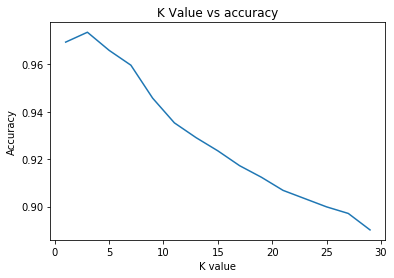

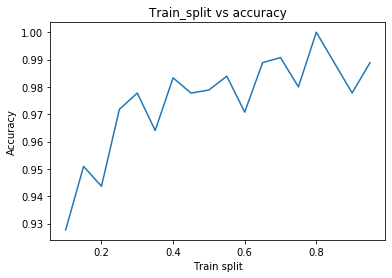

In [7]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 3.3a
        #self.train_x = np.array() # A 2D np.array of training examples, REPLACE
        #self.train_y = np.array() # A 1D np.array of training answers, REPLACE
        #self.test_x = np.array() # A 2D np.array of testing examples, REPLACE
        #self.test_y = np.array() # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        n_samples = len(digits.images)
        X, y = sklearn.utils.shuffle(digits.data,digits.target)
        split = int(n_samples*trainPercentage)
        self.train_x  =X[:split]
        self.train_y =np.array([y[:split]])
        self.test_x=X[split:]
        self.test_y=np.array([y[split:]])
        #testX = self.test_x
        #testY = self.test_y
        #C=self.confusionMatrix(testX,testY,1)
        #self.acc=self.accuracy(C)
    
        #END Workspace 3.3a
    def getCounts(self,target):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict()
        for i in range(len(target)):
            for j in range(len(target[i])):
                val = target[i][j]
                if val in counts:
                    counts[val] += 1
                else:
                    counts[val] = 1

        return(counts)
    
    def majority(self, indecies):
        """
        Given indecies, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indecies - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        freq = dict()
        x = self.train_y
        for i in range(len(x)):
            for j in range(len(indecies)):
                for k in range(len(indecies[j])):
                    val = x[i][indecies[j][k]]
                    if val in freq:
                        freq[val]+=1
                    else:
                        freq[val]=1
        itemMaxValue = max(freq.items(), key=lambda a: a[1])
        listOfKeys = list()
        for key,value in freq.items():
            if value == itemMaxValue[1]:
                listOfKeys.append(key)
    
        if len(listOfKeys)==1:
            label=listOfKeys[0]
        else:
            counts1=self.getCounts(self.train_y)
            c=0
            for p in range(len(listOfKeys)-1):
                if counts1[listOfKeys[p+1]]>counts1[listOfKeys[p]] and counts1[listOfKeys[p+1]]>label:
                    c= counts1[listOfKeys[p+1]]
                    label=listOfKeys[p+1]
                else:
                    c= counts1[listOfKeys[p]]
                    label=listOfKeys[p]
        return label
    def confusionMatrix(self, testX, testY,k):
            
        count={}
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                val=testY[i][j]
                if val in count:
                    count[val]+=1
                else:
                    count[val]=1
        target_count=len(count)
            
        C = [[0 for x in range(target_count)] for x in range(target_count)]
        predicted =[]
        for i in range(len(testX)):
            result = self.classify(testX[i],k)
            predicted.append(result)

        actual=[]
        actual = [[0 for x in range(len(predicted))] for x in range(len(predicted))]
        for i in range(len(testY)):
            for j in range(len(testY[i])):
                actual[j]=testY[i][j]

        classes = np.unique(np.concatenate((actual,predicted)))
        C = np.empty((len(classes),len(classes)),dtype=np.int)
        for i,a in enumerate(classes):
            for j,p in enumerate(classes):
                C[i,j] = np.where((actual==a)*(predicted==p))[0].shape[0]
        
        return C
        
    def accuracy(self,C):
        score = np.sum((C.diagonal()) / C.sum())
        return score
    
    #END Workspace 3.3a
    def classify(self,point, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        #HINT: You can copy your own work from the original Numbers class
        self._model = sklearn.neighbors.BallTree(self.train_x)
        dist, ind = self._model.query([point], k)
        ans= self.majority(ind)
        return ans
        #END Workspace 3.2a
        
    def plot_train(self):
        
        X=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        y=[]
        for i in range(len(X)):
            C=self.confusionMatrix(self.test_x,self.test_y,1)
            a= self.accuracy(C)
            y.append(a)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        plt.figure(2, figsize=(8, 6))
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
        plt.xlabel('Train_Percentage')
        plt.ylabel('Accuracy')
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        

X=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])
test1 = Numbers2(0.2)
y=[]
for i in range(len(X)):
    C=test1.confusionMatrix(test1.test_x,test1.test_y,X[i])
    y.append(test1.accuracy(C))

plt.plot(X, y) 

plt.xlabel('K value') 

plt.ylabel('Accuracy') 

plt.title('K Value vs accuracy') 

plt.show()


X=np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])
y=[]
for i in range(len(X)):
    test2 = Numbers2(X[i])
    C=test2.confusionMatrix(test2.test_x,test2.test_y,3)
    y.append(test2.accuracy(C))

plt.plot(X, y) 

plt.xlabel('Train split') 

plt.ylabel('Accuracy') 

plt.title('Train_split vs accuracy') 

plt.show() 





#### 3.2b
TODO: Write description of influence of neighbor count: 
With a train percentage of 0.2, k=3 provided an optimal accuracy of approximately 0.98. With lower k values, the accuracy decreases due to underfitting where the classifier fits closely to the data rather than forming a smoother decision boundary between the underlying pattern. Similarly, with large values of k, the model overfits with an increased probabiity of error as the correct value moves further away from the decision boundary.

#### 3.3b
TODO: Write description of influence of training / testing split: 
The accuracy remained constant for all values of train percentage, after a threshold. For instance, the above digit data exhibited an accuracy of 0.98 for k=3, after a train percentage of 0.8. Where as for k=1, the digit data exhibited an accuracy of 0.99 for some random values of data set. The model does not have the same value of accuracy for different random samples of dataset though. The dataset has high variance, given the large variations in accuracy based on the random samples of datasets.